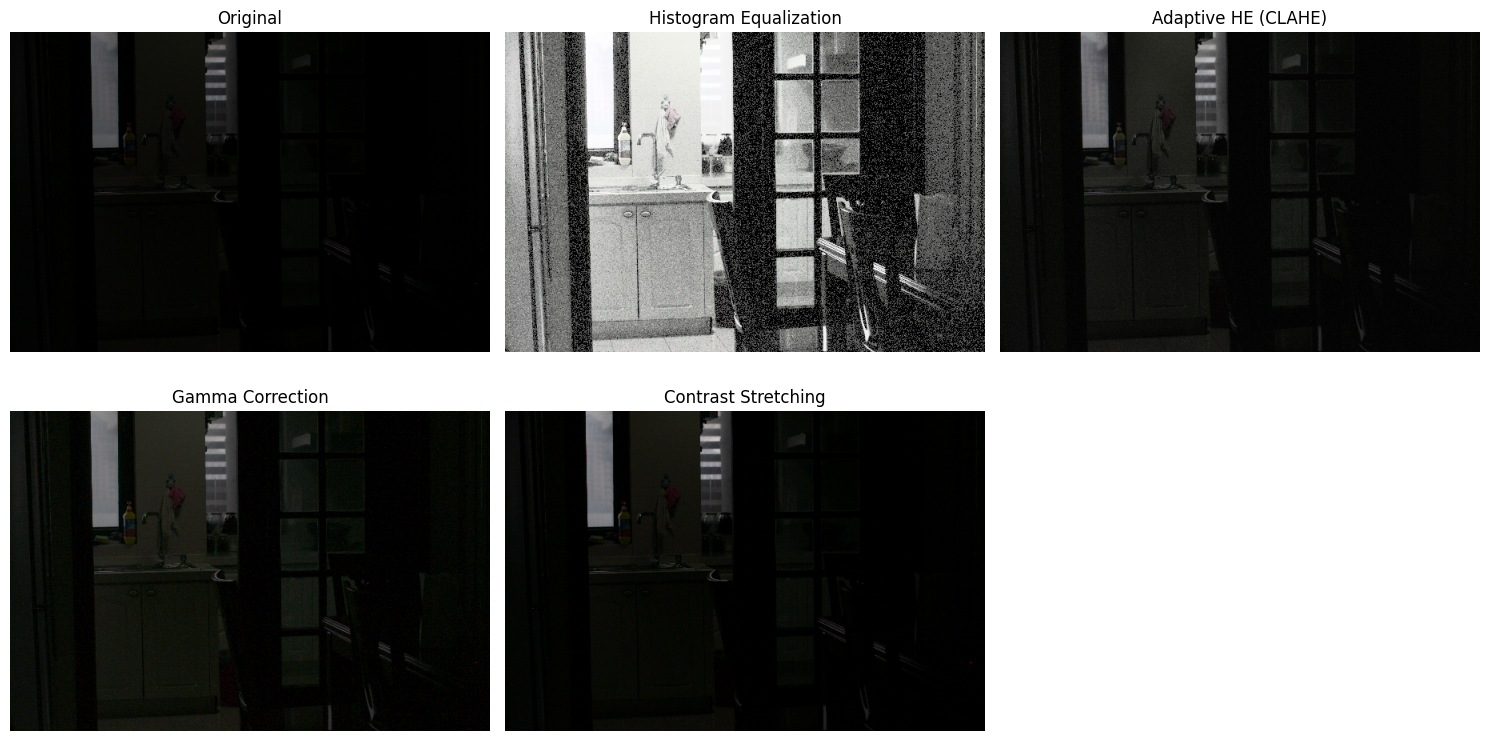

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(img):
    """Apply histogram equalization to enhance contrast."""
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

def adaptive_histogram_equalization(img, clip_limit=2.0, tile_grid_size=(8, 8)):
    """Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)."""
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    img_yuv[:, :, 0] = clahe.apply(img_yuv[:, :, 0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

def gamma_correction(img, gamma=1.5):
    """Apply gamma correction to adjust brightness."""
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(img, table)

def contrast_stretching(img):
    """Apply simple contrast stretching."""
    min_val, max_val = np.min(img), np.max(img)
    stretched = (img - min_val) * (255.0 / (max_val - min_val))
    return stretched.astype(np.uint8)

def enhance_low_light_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Unable to read image.")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert for proper display in Matplotlib

    hist_eq = histogram_equalization(img)
    adaptive_hist_eq = adaptive_histogram_equalization(img)
    gamma_corrected = gamma_correction(img)
    contrast_stretched = contrast_stretching(img)

    # Plot images using Matplotlib
    titles = ["Original", "Histogram Equalization", "Adaptive HE (CLAHE)", "Gamma Correction", "Contrast Stretching"]
    images = [img, hist_eq, adaptive_hist_eq, gamma_corrected, contrast_stretched]

    plt.figure(figsize=(15, 8))
    for i in range(5):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Example Usage
image_path = "./lol_dataset/our485/low/103.png"
enhance_low_light_image(image_path)


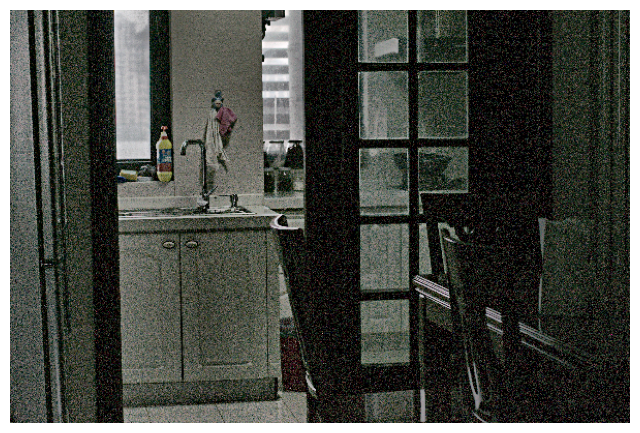

In [7]:
import cv2
def analyze_image(img):
    """ Analyze brightness, contrast, and noise level to decide enhancement techniques. """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    brightness = np.mean(gray)  # Average pixel intensity
    contrast = np.std(gray)  # Standard deviation of pixel intensities
    
    # Estimate noise level using Laplacian variance
    noise_level = cv2.Laplacian(gray, cv2.CV_64F).var()

    return brightness, contrast, noise_level

def adaptive_enhance(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    brightness, contrast, noise_level = analyze_image(img)

    enhanced_img = img.copy()

    # Apply Gamma Correction if brightness is too low
    if brightness < 50:
        gamma = 2.0 if brightness < 30 else 1.5
        enhanced_img = np.array(255 * (enhanced_img / 255) ** (1 / gamma), dtype=np.uint8)

    # Apply Histogram Equalization or CLAHE if contrast is low
    if contrast < 40:
        yuv = cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2YUV)
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
        yuv[:, :, 0] = clahe.apply(yuv[:, :, 0])
        enhanced_img = cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB)

    # Apply Bilateral Filter if noise level is high
    if noise_level > 100:
        enhanced_img = cv2.bilateralFilter(enhanced_img, 9, 75, 75)

    # Apply Unsharp Masking to enhance details
    gaussian = cv2.GaussianBlur(enhanced_img, (0, 0), 3)
    enhanced_img = cv2.addWeighted(enhanced_img, 1.5, gaussian, -0.5, 0)

    return enhanced_img

# Example Usage
image_path = "./lol_dataset/our485/low/103.png"
enhanced_image = adaptive_enhance(image_path)

# Display the result
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(enhanced_image)
plt.axis("off")
plt.show()

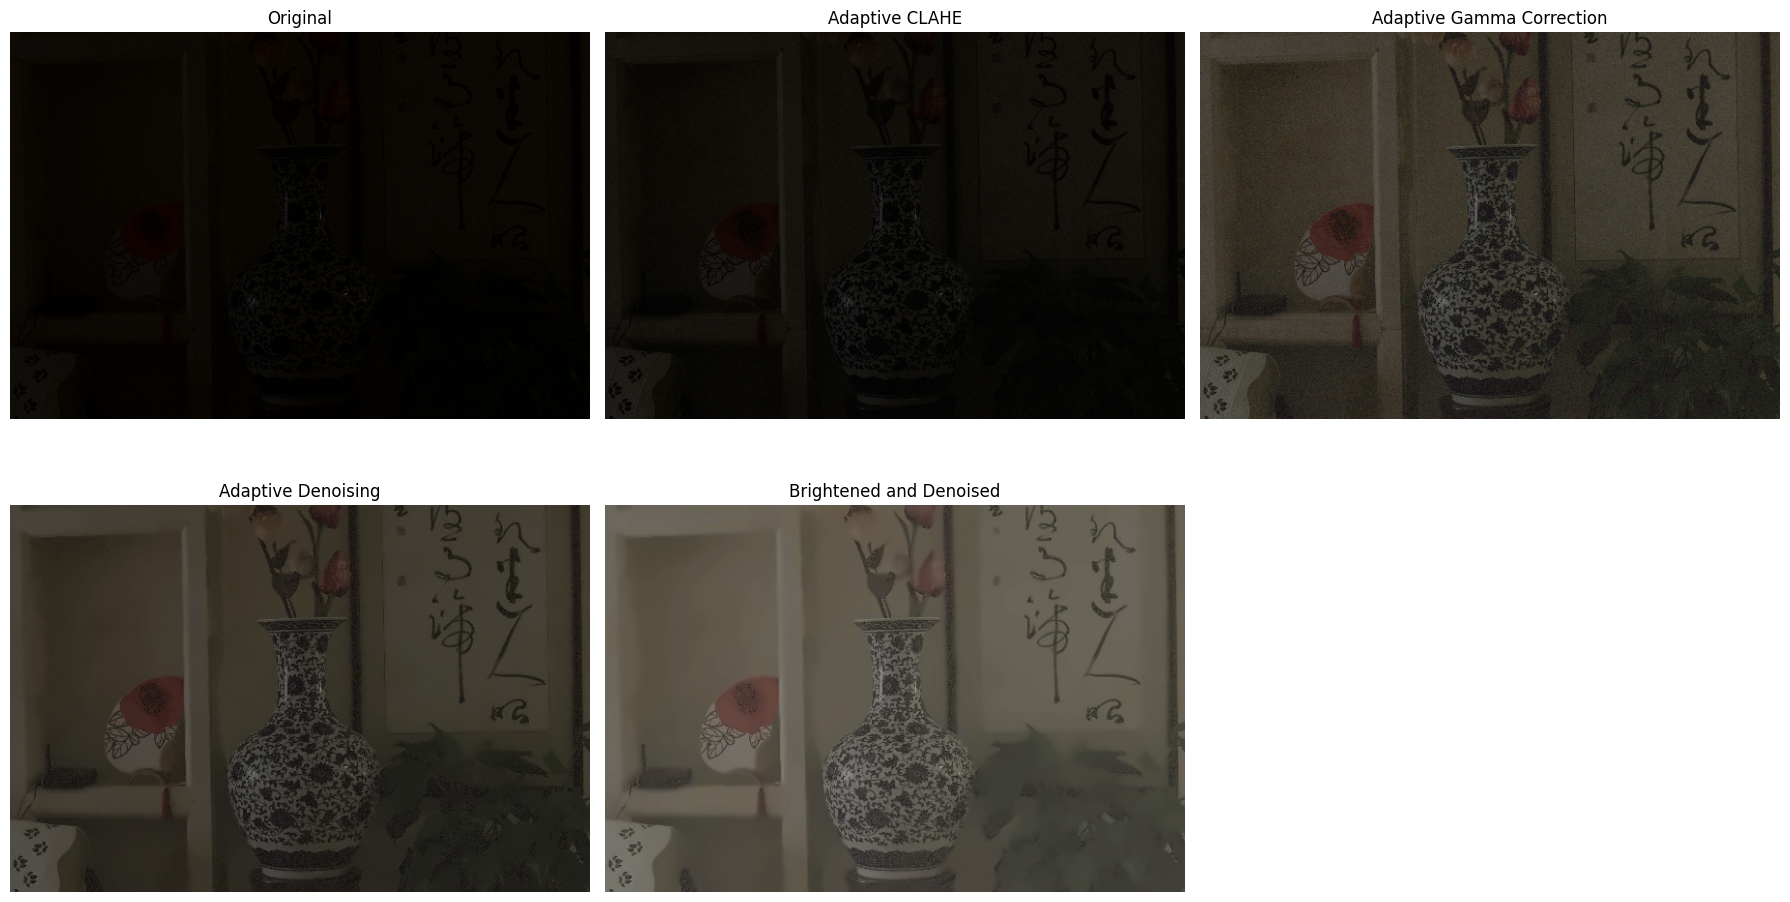

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_brightness(img):
    return np.mean(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

def calculate_contrast(img):
    return np.std(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

def adaptive_clahe(img, clip_limit_factor=2.0, tile_grid_size=(8, 8)):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    contrast = calculate_contrast(img)
    clip_limit = max(1.0, min(4.0, clip_limit_factor * (contrast / 64.0)))  # Adjust clip limit dynamically
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    img_yuv[:, :, 0] = clahe.apply(img_yuv[:, :, 0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

def adaptive_gamma_correction(img):
    brightness = calculate_brightness(img)
    gamma = 1.0 + (128 - brightness) / 128.0  # Adjust gamma based on brightness
    gamma = max(0.5, min(2.5, gamma))  # Limit gamma to a reasonable range
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(img, table)

def adaptive_denoise(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    noise_level = np.std(gray) / 255.0  # Estimate noise level
    denoise_strength = max(5, min(20, int(30 * noise_level)))  # Adjust denoising strength
    return cv2.fastNlMeansDenoisingColored(img, None, denoise_strength, denoise_strength, 7, 21)

def enhance_low_light_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Unable to read image.")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert for proper display in Matplotlib

    # Step 1: Apply adaptive CLAHE
    adaptive_hist_eq = adaptive_clahe(img)

    # Step 2: Apply adaptive gamma correction
    gamma_corrected = adaptive_gamma_correction(adaptive_hist_eq)

    # Step 3: Apply adaptive denoising
    denoised = adaptive_denoise(gamma_corrected)

    # Step 4: Brighten and denoise
    brightness = calculate_brightness(denoised)
    if brightness < 50:
        gamma = 2.0 if brightness < 30 else 1.5
        enhanced_img = np.array(255 * (denoised / 255) ** (1 / gamma), dtype=np.uint8)
        brightened_denoised = adaptive_denoise(enhanced_img)

    # Plot images using Matplotlib
    titles = ["Original", "Adaptive CLAHE", "Adaptive Gamma Correction", "Adaptive Denoising"] + (["Brightened and Denoised"] if brightness < 50 else [])
    images = [img, adaptive_hist_eq, gamma_corrected, denoised] + ([brightened_denoised] if brightness < 50 else [])

    plt.figure(figsize=(18, 10))
    for i in range(len(images)):
        plt.subplot(2, 3, i + 1)  # Change to a 2x3 grid
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis("off")
    
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

    return denoised

# Example Usage
image_path = "./lol_dataset/our485/low/61.png"
new_image = enhance_low_light_image(image_path)